In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pangolin
from sklearn.datasets import fetch_openml
np.set_printoptions(precision=2)
from matplotlib import pyplot as plt

In [9]:
# load data
pima = fetch_openml(name="Pima-Indians-Diabetes", version=1, parser="auto")
X = np.array(pima.data)
y_obs = np.array(pima.target).astype(int)

In [15]:
# define model
w = pangolin.vmap(pangolin.normal,None,axis_size=X.shape[1])(0,1)
means = pangolin.makerv(X) @ w
y = pangolin.vmap(pangolin.bernoulli_logit,0)(means)

engine='numpyro'
posterior correlation matrix


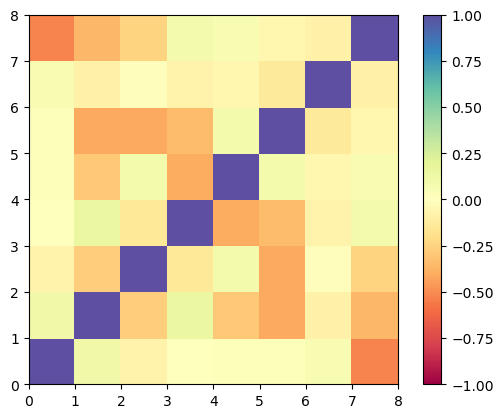

engine='jags'
posterior correlation matrix


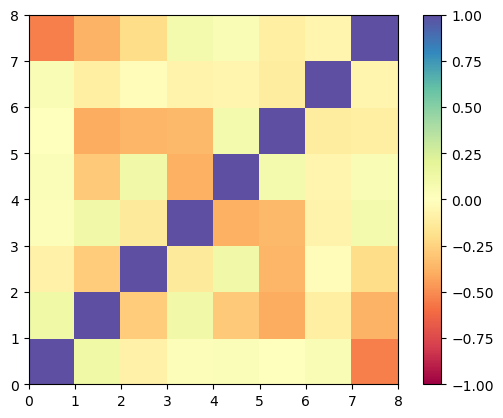

16:13:26 - cmdstanpy - INFO - CmdStan start processing
16:13:26 - cmdstanpy - INFO - Chain [1] start processing
16:14:54 - cmdstanpy - INFO - Chain [1] done processing


engine='stan'
posterior correlation matrix


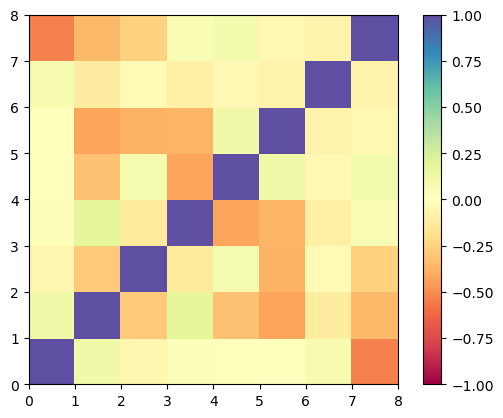

In [16]:
for engine in ["numpyro","jags","stan"]:
    calc = pangolin.Calculate(engine,niter=10000)
    ws = calc.sample(w, y, y_obs)
    print(f"{engine=}")
    C = np.corrcoef(ws.T)
    print("posterior correlation matrix")
    plt.pcolor(C,cmap="Spectral")
    plt.clim([-1,1])
    plt.gca().set_aspect("equal")
    plt.colorbar()
    plt.show()